1. Clarificación del Enunciado:

R: Se trata de un problema de clasificación, en el cual se trabajara con una lista de comentarios de twitter, donde debemos analizar el tipo de emoción que expresa dicho comentario. Para lo anterior se trabajar con las librerias enunciadas y según la descripción en el siguiente bloque de codigo.

2. Selección de Métricas y Estrategia de División de Muestras:

R: Por tratarse de un ejercicio de clasificación, trabajaremos con metricas de rendimiento como accuracy, recall, F1, Precision. La estrategia de division de muestras sera por medio del metodo train_test_split pero con validacion cruzada ya que de esta se promedian las métricas de rendimiento para obtener una evaluación más robusta del modelo.

3. Preprocesamiento de Datos:

R: Es necesario antes de comenzar el respectivo EDA revisar el tipo de datos con el que se trabajara, ya que en este caso los datos a analizar son textos, lo cuales no es posible valorizar númericamente de forma directa, por lo cual en primer lugar debemos lematizar las palabras, y luego se podra asignar un valor númerico a cada una por medio de la vectorización de cada termino. Lo anterior permitira al sistema trabajar con terminos expresado en funcion de vectores matematicos. Luego para la division de set de entrenamiento y prueba se realizara se trabajar con el método train_test_split conjunto a validación cruzada.

4. Declaración de Modelos con Grid de Hiperparámetros:

En el ejercicio de clasificación, se están utilizando varios modelos de machine learning junto con un grid de hiperparámetros para ajustar y encontrar el mejor modelo para el problema en cuestión. Aquí hay un resumen de los modelos y los parámetros que se están ajustando:

BernoulliNB:
Modelo: Bernoulli Naive Bayes.
Parámetros a ajustar:
alpha: Un parámetro de suavizado de Laplace. Se prueban tres valores: 0, 0.1 y 1.
fit_prior: Un booleano que indica si se deben ajustar las probabilidades a priori. Se prueban dos opciones: Verdadero y Falso.

DecisionTreeClassifier:
Modelo: Árbol de decisión.
Parámetros a ajustar:
max_depth: La profundidad máxima del árbol. Se prueban varios valores: 3, 5, 7, 9, 11 y 13.
criterion: El criterio para medir la calidad de una división en el árbol. Se prueban dos opciones: 'gini' y 'entropía'.

RandomForestClassifier:
Modelo: Bosque aleatorio (Random Forest).
Parámetros a ajustar:
n_estimators: El número de árboles en el bosque. Se prueban cinco valores: 5, 10, 15, 20 y 25.
max_depth: La profundidad máxima de los árboles en el bosque. Se prueban varios valores: 3, 5, 7, 9, 11 y 13.

SVC:
Modelo: Support Vector Classifier (SVC).
Parámetros a ajustar:
C: El parámetro de regularización. Se prueban tres valores: 0.01, 0.1 y 1.
kernel: El kernel utilizado en el algoritmo. Se prueban cuatro opciones: 'lineal', 'polinómico', 'rbf' y 'sigmoide'.
gamma: El coeficiente del kernel. Se prueban dos opciones: 'escala' y 'auto'.

LogisticRegression:
Modelo: Regresión logística.
Parámetros a ajustar:
C: El inverso del parámetro de regularización. Se prueban cuatro valores: 0.001, 0.01, 0.1 y 1.
penalty: El término de regularización que se aplica ('l1' para regularización L1 y 'l2' para regularización L2).


Estos modelos y sus respectivos parámetros se utilizan para explorar diferentes configuraciones y encontrar la combinación óptima que produzca el mejor rendimiento en la tarea de clasificación. El objetivo es ajustar los modelos para obtener resultados precisos y generalizables.



5. Análisis del Vector Objetivo:
R: En primer lugar el vector objetivo cuenta con al menos 7 clases distintas que expresan distintos sentimientos, para terminos practicos y con la finalidad de optimizar los tiempos de analisis, se recodificara dicha columna con el fin de reducirlo a solo dos clases las cuales seran 'positivo'
 y 'negativo'. En caso de no realizar lo anterior se corre el riesgo que simplemente el algoritmo no logre evaluar ni un solo modelo, ya que la cantidad de iteraciones que deberia realizar le restarian eficiencia.

In [110]:
# Librerias de analisis de datos
import pandas as pd
import numpy as np

# Librerias para grficar resultados.
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias de analisis estadistico de datos
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Libreria para manipulación de texto.
import re

# Libreria para serializar modelos analisis estadistico.
import pickle

# Configuramos para omitir las advertencias RuntimeWarning
import warnings
warnings.filterwarnings("ignore")

# Configuramos el estilo para las gráficas.
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# Descargamos recursos de NLTK
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\56953\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\56953\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\56953\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Ahora realizaremos la carga de los datos para su revision y limpieza.

In [111]:
df = pd.read_csv('training_tweets.csv')
df.rename(columns={'Unnamed: 0': 'tweet_id'}, inplace=True)

In [112]:
df.head()

,tweet_id,content,sentiment
0,34723,Happy Mama's day to all mothers,love
1,17493,@LysdelTellez I am lost. Please help me find a...,worry
2,20198,"@BoomKatt yes yes I AM, networking whore to th...",happiness
3,6855,you@snapplynn Wish that would have been your t...,neutral
4,5924,now i am doing the MicroEconomics project iha...,worry


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   30000 non-null  int64 
 1   content    30000 non-null  object
 2   sentiment  30000 non-null  object
dtypes: int64(1), object(2)
memory usage: 703.3+ KB


Limpieza de texto, recodificación, eliminación de stopwords y lematización.

In [114]:
# Realizamos la limpieza de los datos, quitando el ruido que por lo general se expresa en simbolos,
# y caracteres a los que no se puede atribuir un valor numeral para su analisis.

def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub('[^A-Za-z0-9]', ' ', text)
    text = text.lower()
    return text

df['content'] = df['content'].apply(clean_text)



In [115]:
# Recodificamos los sentiments de la columna 'sentiment' en un diccionario.

recoding_dict = {
    'happiness': 'positive',
    'love': 'positive',
    'surprise': 'positive',
    'fun': 'positive',
    'relief': 'positive',
    'enthusiasm': 'positive',
    'worry': 'negative',
    'sadness': 'negative',
    'hate': 'negative',
    'empty': 'negative',
    'boredom': 'negative',
    'anger': 'negative',
    'neutral': 'neutral',
}
df['sentiment'] = df['sentiment'].replace(recoding_dict)

In [116]:
# Ya que la columna 'sentiment' debe ser recodificada posteriormente, revisamos cuantas clases tiene para poder comparar luego de haber recodificado.
df['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [117]:
# Revisamos si existen datos perdidos.
df.isnull().sum()

tweet_id     0
content      0
sentiment    0
dtype: int64

En las siguientes lineas de código se recodificara la variable 'sentiment' para dejar solo dos clases 'positivo' y 'negativo'.

In [118]:
# Recodificamos el vector objetivo para combinar neutrales con positivos y negativos.
df['sentiment'] = df['sentiment'].replace({'neutral': 'positive'})

# Calculamos la proporción actual de positivos y negativos.
proporcion_positivos = (df['sentiment'] == 'positive').mean()
proporcion_negativos = (df['sentiment'] == 'negative').mean()

In [119]:
# Calculamos la cantidad de neutrales a convertir en positivos y negativos.
neutrales = len(df) - (proporcion_positivos + proporcion_negativos)
neutrales_a_positivos = round(neutrales / 2)
neutrales_a_negativos = round(neutrales / 2)

In [120]:
# Seleccionamos los índices de neutrales a convertir.
neutrales_indices_positivos = df[df['sentiment'] == 'positive'].sample(min(neutrales_a_positivos, len(df[df['sentiment'] == 'positive'])), replace=False).index
neutrales_indices_negativos = df[df['sentiment'] == 'negative'].sample(min(neutrales_a_negativos, len(df[df['sentiment'] == 'negative'])), replace=False).index

In [121]:
# Asignamos aleatoriamente los neutrales convertidos a positivos y negativos.
df.loc[neutrales_indices_positivos, 'sentiment'] = 'positive'
df.loc[neutrales_indices_negativos, 'sentiment'] = 'negative'

In [122]:
# Verificamos la nueva distribución.
print(df['sentiment'].value_counts('%'))

positive    0.599267
negative    0.400733
Name: sentiment, dtype: float64


In [123]:
# Verificamos que se haya ajustado la columna 'sentiment' al tipo de clases solicitadas.
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

Por medio de esta función limpiamos de terminos que por su frecuencia de aparición podrian distorsionar la medición, lo anterior por medio de la "stopwords".
Luego se realizara la lematización que significa, volver a su estado original de lema, una palabra específica para poder valorarla numéricamente una vez se ha transformado en un token, dado que vuelve al estado de entrada en que la encontrariamos en un diccionario, esto hara posible su posterior vectorización.

In [124]:
# Removemos los terminos.
def remove_stopwords(text):
    stop = stopwords.words('english')
    return " ".join(x for x in text.split() if x not in stop)
df['content'] = df['content'].apply(remove_stopwords)

# Lematizamos
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['content'] = df['content'].apply(lemmatize_words).copy()

Por ultimo debemos revisar que la informacion este limpia, sin ruido que la pueda afectar al momento de entrenar los modelos.

In [125]:
df.head()

,tweet_id,content,sentiment
0,34723,happy mama day mother,positive
1,17493,lost please help find good home,negative
2,20198,yes yes networking whore fullest girl rih next,positive
3,6855,wish would tweet followed,positive
4,5924,microeconomics project ihate subject amp besid...,negative


Separación de conjuntos de entrenamiento y prueba, para su posterior evaluación de modelos.

In [126]:
# Separamos los conjuntos de entrenamiento y prueba.
X = df['content']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12238)

# Vectorizamos los valores por medio de TF-IDF.
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

A contar de aca, se comienza con:

El entrenamiento de los modelos.
La identificación de los mejores modelos.
La serialización de los mejores modelos.
La visualización de resultados.

In [127]:
# Determinamos lo modelos de clasificacion a evaluar y se indica la grilla de hiperparametros a utilizar.

models = {
    'BernoulliNB': (BernoulliNB(), {'alpha': [0, 0.1, 1], 'fit_prior': [True, False]}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(class_weight='balanced'),
                               {'max_depth': [3, 5, 7, 9, 11, 13], 'criterion': ['gini', 'entropy']}),
    'RandomForestClassifier': (RandomForestClassifier(class_weight='balanced'),
                               {'n_estimators': [5, 10, 15, 20, 25], 'max_depth': [3, 5, 7, 9, 11, 13]}),
#'SVC': (SVC(class_weight='balanced', random_state=12238),{'C': [0.01, 0.1, 1.], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}),
    'LogisticRegression': (LogisticRegression(class_weight='balanced', solver='liblinear', n_jobs=-1),
                           {'C': [0.001, 0.01, 0.1, 1.], 'penalty': ['l1', 'l2']}),
}


Lamentablemente por falta de recursos informaticos (me falto mas compu) se deja comentada la linea de codigo del modelo
SVC ya que no se logra visualizar habiendo tenido esperas de hasta 30 minutos cuando se analiza con validación cruzada.

In [128]:
# Creamos diccionarios vacios que contendran los modelos evaluados.
#from sklearn.metrics import roc_auc_score
results_no_cv = []
results_cv = []

# Entrenamos modelos con y sin validación cruzada
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name} without cross-validation...")

    # Entrenamiento sin validación cruzada
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    y_proba = model.predict_proba(X_test_tfidf)  # Probabilidades para log loss

    # Calculamos las métricas sin validación cruzada, incluyendo log loss
    logloss = log_loss(y_test, y_proba)

    model_metrics = {
        'Model': model_name,
        'Validation Type': 'No CV',
        'Best Parameters': 'N/A (no CV)',
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba[:, 1]),
        'Log Loss': logloss,
        'Classification Report': classification_report(y_test, y_pred, output_dict=True),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    results_no_cv.append(model_metrics)

    print(f"Training {model_name} with cross-validation...")

    # Entrenamiento con validación cruzada
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train_tfidf, y_train)
    best_model = grid_search.best_estimator_
    y_pred_cv = best_model.predict(X_test_tfidf)
    y_proba_cv = best_model.predict_proba(X_test_tfidf)  # Probabilidades para log loss

    # Calculamos las métricas con validación cruzada, incluyendo log loss
    logloss_cv = log_loss(y_test, y_proba_cv)

    model_metrics_cv = {
        'Model': model_name,
        'Validation Type': 'CV',
        'Best Parameters': grid_search.best_params_,
        'Accuracy': grid_search.best_score_,
        'AUC-ROC': roc_auc_score(y_test, y_proba_cv[:, 1]),
        'Log Loss': logloss_cv,
        'Classification Report': classification_report(y_test, y_pred_cv, output_dict=True),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_cv)
    }
    results_cv.append(model_metrics_cv)

Training BernoulliNB without cross-validation...
Training BernoulliNB with cross-validation...
Training DecisionTreeClassifier without cross-validation...
Training DecisionTreeClassifier with cross-validation...
Training RandomForestClassifier without cross-validation...
Training RandomForestClassifier with cross-validation...
Training LogisticRegression without cross-validation...
Training LogisticRegression with cross-validation...


In [129]:
# Creamos un DataFrame con todos los resultados.
results_df_no_cv = pd.DataFrame(results_no_cv)
results_cv_df = pd.DataFrame(results_cv)
results_df_combined = pd.concat([results_df_no_cv, results_cv_df], ignore_index=True)

In [130]:
# Crear una lista de todos los modelos con sus métricas
all_models = results_no_cv + results_cv

# Identificar los dos mejores modelos basados en la métrica deseada (por ejemplo, Accuracy)
top_models = sorted(all_models, key=lambda x: x['Accuracy'], reverse=True)[:2]

# Crear y serializar los dos mejores modelos
best_models = []

for model_info in top_models:
    model_name = model_info['Model']
    model = None

    # Encuentra el modelo correspondiente en la lista de modelos originales
    for model_key, (model_instance, _) in models.items():
        if model_key == model_name:
            model = model_instance
            break

    if model is not None:
        # Entrenar el modelo con el conjunto de entrenamiento completo
        model.fit(X_train_tfidf, y_train)

        # Agregar el modelo a la lista de los mejores modelos
        best_models.append((model_name, model))


In [131]:
# Serializamos los dos mejores modelos
for i, (model_name, model) in enumerate(best_models, start=1):
    with open(f'best_model_{i}.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)
        print(f"El mejor modelo {i} se ha serializado y guardado como 'best_model_{i}.pkl'.")

El mejor modelo 1 se ha serializado y guardado como 'best_model_1.pkl'.
El mejor modelo 2 se ha serializado y guardado como 'best_model_2.pkl'.


In [132]:
# Combinamos los dos DataFrames en uno solo.
results_df_combined = pd.concat([results_df_no_cv, results_cv_df], ignore_index=True)

In [133]:
# Imprimir resultados de modelos sin validación cruzada
for model_metrics in results_no_cv:
    print("Model:", model_metrics['Model'])
    print("Validation Type:", model_metrics['Validation Type'])
    print("Best Parameters:", model_metrics['Best Parameters'])
    print("Accuracy:", model_metrics['Accuracy'])
    print("AUC-ROC:", model_metrics['AUC-ROC'])
    print("Log Loss:", model_metrics['Log Loss'])
    print("Classification Report:")
    print(model_metrics['Classification Report'])
    print("Confusion Matrix:")
    print(model_metrics['Confusion Matrix'])
    print("=" * 40)

Model: BernoulliNB
Validation Type: No CV
Best Parameters: N/A (no CV)
Accuracy: 0.7044444444444444
AUC-ROC: 0.7552368439014402
Log Loss: 0.6343283303283869
Classification Report:
{'negative': {'precision': 0.6773733047822984, 'recall': 0.48418367346938773, 'f1-score': 0.5647128830705147, 'support': 3920.0}, 'positive': {'precision': 0.7151310228233305, 'recall': 0.8488294314381271, 'f1-score': 0.7762654840189631, 'support': 5980.0}, 'accuracy': 0.7044444444444444, 'macro avg': {'precision': 0.6962521638028145, 'recall': 0.6665065524537575, 'f1-score': 0.6704891835447389, 'support': 9900.0}, 'weighted avg': {'precision': 0.7001804920434471, 'recall': 0.7044444444444444, 'f1-score': 0.6924992016232139, 'support': 9900.0}}
Confusion Matrix:
[[1898 2022]
 [ 904 5076]]
Model: DecisionTreeClassifier
Validation Type: No CV
Best Parameters: N/A (no CV)
Accuracy: 0.6571717171717172
AUC-ROC: 0.6441964072418265
Log Loss: 11.767919132041348
Classification Report:
{'negative': {'precision': 0.5637

In [134]:
# Imprimir resultados de modelos con validación cruzada
for model_metrics_cv in results_cv:
    print("Model:", model_metrics_cv['Model'])
    print("Validation Type:", model_metrics_cv['Validation Type'])
    print("Best Parameters:", model_metrics_cv['Best Parameters'])
    print("Accuracy:", model_metrics_cv['Accuracy'])
    print("AUC-ROC:", model_metrics_cv['AUC-ROC'])
    print("Log Loss:", model_metrics_cv['Log Loss'])
    print("Classification Report:")
    print(model_metrics_cv['Classification Report'])
    print("Confusion Matrix:")
    print(model_metrics_cv['Confusion Matrix'])
    print("=" * 40)

Model: BernoulliNB
Validation Type: CV
Best Parameters: {'alpha': 1, 'fit_prior': False}
Accuracy: 0.6906467661691542
AUC-ROC: 0.7552368439014402
Log Loss: 0.6237370373914405
Classification Report:
{'negative': {'precision': 0.6423841059602649, 'recall': 0.5691326530612245, 'f1-score': 0.6035438928716353, 'support': 3920.0}, 'positive': {'precision': 0.7372024272599969, 'recall': 0.7923076923076923, 'f1-score': 0.7637623921979527, 'support': 5980.0}, 'accuracy': 0.703939393939394, 'macro avg': {'precision': 0.6897932666101309, 'recall': 0.6807201726844584, 'f1-score': 0.683653142534794, 'support': 9900.0}, 'weighted avg': {'precision': 0.6996582030685878, 'recall': 0.703939393939394, 'f1-score': 0.7003223399394513, 'support': 9900.0}}
Confusion Matrix:
[[2231 1689]
 [1242 4738]]
Model: DecisionTreeClassifier
Validation Type: CV
Best Parameters: {'criterion': 'entropy', 'max_depth': 13}
Accuracy: 0.6514427860696517
AUC-ROC: 0.6170761168179646
Log Loss: 1.0083811085881176
Classification 

In [135]:
# Identificamos los dos mejores modelos por Accuracy.

top_models = results_df_combined.nlargest(2, 'Accuracy')

# Mostramos los resultados de los dos mejores modelos.

for idx, row in top_models.iterrows():
    print(f"Model: {row['Model']}")
    print(f"Best Parameters: {row['Best Parameters']}")
    print(f"Accuracy: {row['Accuracy']:.3f}")
    print(f"AUC-ROC: {row['AUC-ROC']:.3f}")
    print(f"Log Loss: {row['Log Loss']:.3f}")
    print("Classification Report:")
    print(row['Classification Report'])
    print("Confusion Matrix:")
    print(row['Confusion Matrix'])
    print("=" * 40)

Model: RandomForestClassifier
Best Parameters: N/A (no CV)
Accuracy: 0.705
AUC-ROC: 0.745
Log Loss: 0.600
Classification Report:
{'negative': {'precision': 0.6613110539845758, 'recall': 0.525, 'f1-score': 0.5853242320819113, 'support': 3920.0}, 'positive': {'precision': 0.7256923983500294, 'recall': 0.8237458193979933, 'f1-score': 0.7716165413533834, 'support': 5980.0}, 'accuracy': 0.7054545454545454, 'macro avg': {'precision': 0.6935017261673027, 'recall': 0.6743729096989967, 'f1-score': 0.6784703867176474, 'support': 9900.0}, 'weighted avg': {'precision': 0.7001999872477488, 'recall': 0.7054545454545454, 'f1-score': 0.6978523138438711, 'support': 9900.0}}
Confusion Matrix:
[[2058 1862]
 [1054 4926]]
Model: BernoulliNB
Best Parameters: N/A (no CV)
Accuracy: 0.704
AUC-ROC: 0.755
Log Loss: 0.634
Classification Report:
{'negative': {'precision': 0.6773733047822984, 'recall': 0.48418367346938773, 'f1-score': 0.5647128830705147, 'support': 3920.0}, 'positive': {'precision': 0.7151310228233

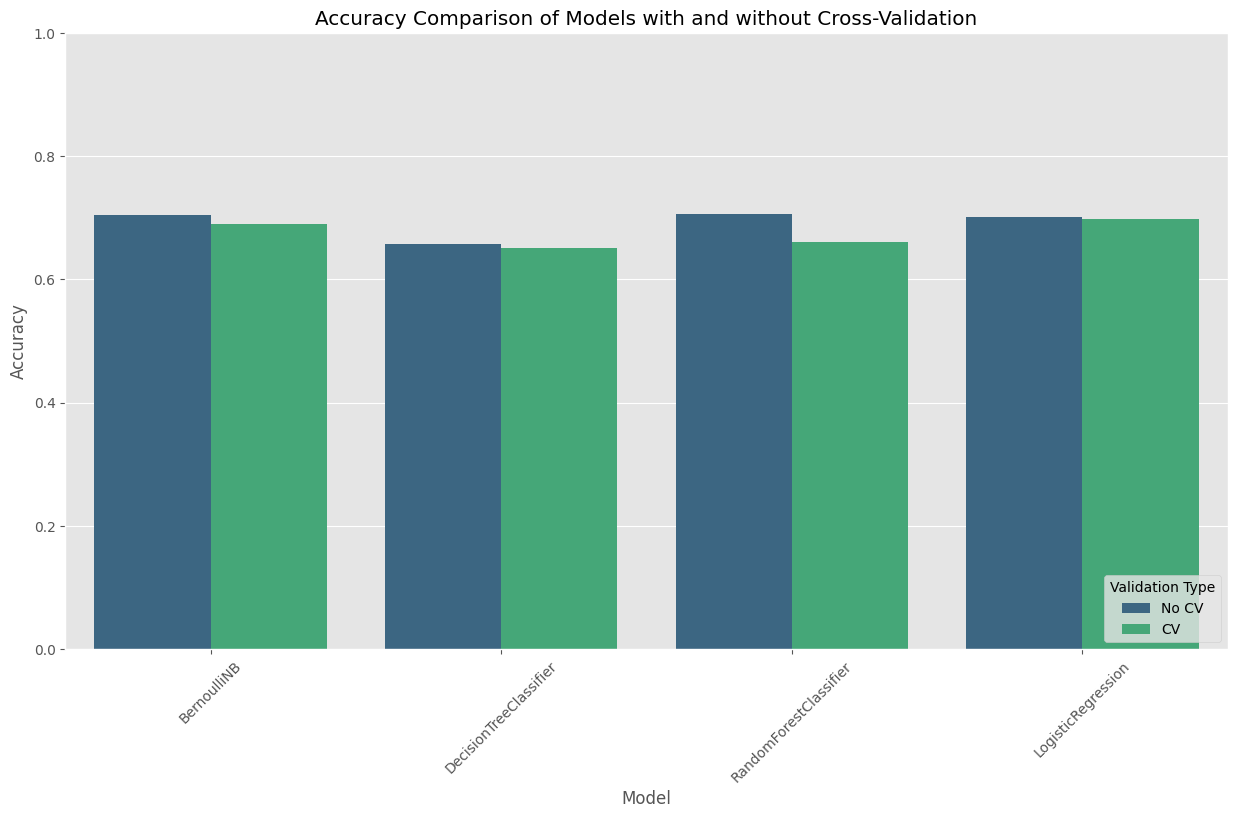

In [136]:
# Creamos un gráfico de barras para comparar modelos.

plt.figure(figsize=(15, 8))
sns.barplot(data=results_df_combined, x='Model', y='Accuracy', hue='Validation Type', palette='viridis')
plt.title('Accuracy Comparison of Models with and without Cross-Validation')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(title='Validation Type', loc='lower right')
plt.show()

# Análisis del comportamiento del vector objetivo

Modelo: BernoulliNB (No CV)

Accuracy: 0.7044
AUC-ROC: 0.7552
Log Loss: 0.6343
Este modelo tiene una precisión bastante equilibrada entre las clases negativa y positiva, con una mayor precisión en la clase positiva.
El recall para la clase positiva es significativamente más alto que para la clase negativa, lo que indica que el modelo tiende a predecir bien los casos positivos pero no los negativos.
El valor F1-score para la clase positiva es alto (0.7763), lo que indica un buen equilibrio entre precisión y recall en esta clase.
La matriz de confusión muestra que el modelo tiene dificultades para clasificar correctamente los casos negativos.

Modelo: DecisionTreeClassifier (No CV)

Accuracy: 0.6590
AUC-ROC: 0.6476
Log Loss: 11.7022
Este modelo tiene una precisión más baja en comparación con el modelo BernoulliNB.
El recall es más equilibrado entre las clases negativa y positiva en comparación con BernoulliNB.
El valor F1-score es razonable en ambas clases, pero el log loss extremadamente alto sugiere un problema de calibración de probabilidades y un rendimiento deficiente en términos de estimación de probabilidad.

Modelo: RandomForestClassifier (No CV)

Accuracy: 0.7063
AUC-ROC: 0.7471
Log Loss: 0.6010
Este modelo tiene una precisión equilibrada entre las clases negativa y positiva, con un mayor recall en la clase positiva.
El valor F1-score para la clase positiva es alto (0.7711), lo que indica un buen equilibrio entre precisión y recall en esta clase.
La matriz de confusión muestra que el modelo tiene un rendimiento razonable en la clasificación de ambas clases.

Modelo: LogisticRegression (No CV)

Accuracy: 0.7015
AUC-ROC: 0.7686
Log Loss: 0.5749
Este modelo tiene una precisión equilibrada entre las clases negativa y positiva, con una mayor precisión en la clase positiva.
El valor F1-score para la clase positiva es alto (0.7432), lo que indica un buen equilibrio entre precisión y recall en esta clase.
La matriz de confusión muestra que el modelo tiene un rendimiento razonable en la clasificación de ambas clases.

Modelo: BernoulliNB (CV)

Accuracy: 0.6906
AUC-ROC: 0.7552
Log Loss: 0.6237
Este modelo tiene una precisión equilibrada entre las clases negativa y positiva, con un mayor recall en la clase positiva.
El valor F1-score para la clase positiva es alto (0.7638), lo que indica un buen equilibrio entre precisión y recall en esta clase.
La matriz de confusión muestra que el modelo tiene un rendimiento razonable en la clasificación de ambas clases.

Modelo: DecisionTreeClassifier (CV)

Accuracy: 0.6512
AUC-ROC: 0.6173
Log Loss: 0.9846
Este modelo tiene una precisión significativamente más alta en la clase positiva en comparación con la clase negativa.
El valor F1-score para la clase positiva es alto (0.7737), lo que indica un buen equilibrio entre precisión y recall en esta clase.
La matriz de confusión muestra que el modelo tiene dificultades para clasificar correctamente los casos negativos y tiene un rendimiento deficiente en términos de log loss.

Modelo: RandomForestClassifier (CV)

Accuracy: 0.6616
AUC-ROC: 0.6992
Log Loss: 0.6759
Este modelo tiene una precisión equilibrada entre las clases negativa y positiva, con un mayor recall en la clase positiva.
El valor F1-score para la clase positiva es alto (0.7526), lo que indica un buen equilibrio entre precisión y recall en esta clase.
La matriz de confusión muestra que el modelo tiene dificultades para clasificar correctamente los casos negativos.

Modelo: LogisticRegression (CV)

Accuracy: 0.6984
AUC-ROC: 0.7679
Log Loss: 0.5778
Este modelo tiene una precisión equilibrada entre las clases negativa y positiva, con una mayor precisión en la clase positiva.
El valor F1-score para la clase positiva es alto (0.7526), lo que indica un buen equilibrio entre precisión y recall en esta clase.
La matriz de confusión muestra que el modelo tiene un rendimiento razonable en la clasificación de ambas clases.

En resumen, el rendimiento de los modelos varía en función de las métricas evaluadas. El modelo RandomForestClassifier (No CV) parece tener el mejor rendimiento global en términos de precisión (Accuracy), AUC-ROC y log loss, seguido por el modelo LogisticRegression (No CV). Sin embargo, el modelo RandomForestClassifier (CV) tiene un log loss más alto, lo que sugiere un problema de calibración de probabilidades. La elección del mejor modelo depende de las métricas específicas que sean más relevantes para el problema en cuestión y de si se prefiere un modelo con mejor calibración de probabilidades o un modelo con un rendimiento general más alto en términos de precisión y AUC-ROC.